In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from io import StringIO
import seaborn as sb
import warnings
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from IPython.display import Image

# **TITANIC** 🚢

## **OBTENCIÓN DE DATOS**

[Enlace](https://www.kaggle.com/datasets/heptapod/titanic) al Kaggle

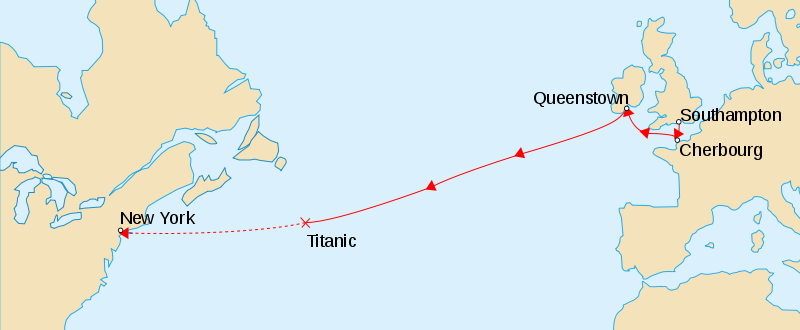

In [217]:
titanic = pd.read_csv('titanic.csv')
Image(filename='ruta-titanic.png')

## **DESCRIPCIÓN DE LOS DATOS**

In [218]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Los atributos clave del conjunto de datos incluyen:

* **Clase del pasajero** (Pclass): Esta variable categórica indica la clase de billete de cada pasajero, que va desde la 1ª clase (los más ricos) a la 3ª clase (estatus socioeconómico más bajo).

* **Name**: Los nombres de los pasajeros, que permiten conocer su identidad.

* **Sex**: Sexo de los pasajeros, clasificados como hombres o mujeres.

* **Age**: Edad de los pasajeros, proporcionando información sobre la composición demográfica de los pasajeros del Titanic.

* **SibSp**: Número de hermanos/cónyuges a bordo del Titanic, ofreciendo información sobre las relaciones familiares.

* **Parch**: Número de padres/hijos a bordo del Titanic, indicando el tamaño y composición de la familia.

* **Ticket**: Número de billete, que proporciona información adicional sobre el alojamiento de los pasajeros y los detalles de la tarifa.

* **Fare**: Tarifa pagada por cada pasajero, que puede ser indicativa de su clase de billete y estatus económico.

* **Cabin** Número o ubicación de la cabina, que ofrece información sobre el alojamiento de los pasajeros.

* **Embarked**: Puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton), que ofrece información sobre los puntos de embarque de los pasajeros.

* **Survived**: Esta variable binaria indica si un pasajero sobrevivió a la catástrofe (1) o no (0), sirviendo como variable principal de resultado para los análisis.

# **TIPOS DE DATOS**

## (funciones)

In [219]:
gnbu = px.colors.sequential.GnBu
blues = px.colors.sequential.Blues
deep = sb.color_palette('deep')
cubehelix = sb.cubehelix_palette(start=.5, rot=-.75, as_cmap=False)

In [220]:
def countplot_legend(column, palette=cubehelix):
  plt.figure(figsize=(6, 4))
  plt.title(column, fontsize=10, fontweight='bold', fontname='sans-serif', ha='center')
  ax = sb.countplot(x=column, data=titanic, palette=palette, hue=column, legend=True)
  for container in ax.containers: ax.bar_label(container)
  warnings.filterwarnings("ignore")
  plt.show()

In [221]:
def countplot(column, text_labels, palette=gnbu):
    fig = go.Figure(data=[go.Bar(x=text_labels, y=titanic[column].value_counts(), marker=dict(color=palette))])
    fig.update_layout(title=column, xaxis=dict(title='Labels', tickmode='array', tickvals=[0, 1, 2], ticktext=text_labels), yaxis=dict(title='Count'))
    fig.show()

## Info

In [222]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## **Columnas categóricas**

### Survived

In [223]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Booleano que indica que sobrevivió (1) o no (0)

In [224]:
countplot('Survived', ['NO', 'SI'], ['#BD5858', '#6AAB68'])

### Pclass

In [225]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

1. Clase rica
2. Clase media
3. Clase baja

In [226]:
countplot('Pclass', ['CLASE BAJA', 'CLASE ALTA', 'CLASE MEDIA'], [blues[2], blues[3], blues[4]])

### Sex

In [227]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

String que indica si es hombre o mujer.

In [228]:
countplot('Sex', ['HOMBRES', 'MUJERES'], ['#58A0BD', '#B46E99'])

### Embarked

In [229]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

S.   Southampton

C.   Cherbourg

Q.   Queenstown

In [230]:
countplot('Embarked', ['SOUTHAMPTON', 'CHERBOURG', 'QUEENSTOWN'], [gnbu[6], gnbu[7], gnbu[8]])

La mayoría de las personas embarcaron en Southampon porque fue el puerto del que partió el Titanic.

## **Columnas no categóricas**

### Edad

In [231]:
fig = px.histogram(titanic.dropna(subset=['Age']), x='Age', nbins=20, color_discrete_sequence=['#709DA5'])
fig.update_layout(xaxis_title='Edad', yaxis_title='Número de pasajeros', title='Distribución de edades de los pasajeros')
fig.show()

### Fare

In [232]:
titanic['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

Indica que tarifa pagó el pasajero.

In [233]:
fig = px.histogram(titanic.dropna(subset=['Fare']), x='Fare', nbins=20, color_discrete_sequence=['#8EC0A3'])
fig.update_layout(xaxis_title='Precio', yaxis_title='Número de pasajes', title='Distribución de los precios del pasaje')
fig.show()

### Cabin

In [234]:
titanic['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

Indica el o los camarotes en las que se alojó el pasajero.

### Ticket

In [235]:
titanic['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

### SibSp

In [236]:
titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Número de hermanos o cónyungues a bordo.

### Parch

In [237]:
titanic['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Número de padres o hijos a bordo.

# **DATOS DE EJEMPLO**

In [238]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **ESTADÍSTICAS DESCRIPTIVAS**

In [239]:
del titanic['PassengerId']

In [240]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### (functions)

In [241]:
def countplot_survived(column, hue_column, text_labels, palette=cubehelix):
  warnings.filterwarnings("ignore")
  plt.figure(figsize=(6, 4))
  plt.title(column, fontsize=10, fontweight='bold', fontname='sans-serif', ha='center')
  ax = sb.countplot(x=column, data=titanic, order=titanic[column].value_counts().index, palette=palette, hue=hue_column)
  ax.set_xticklabels(text_labels, fontsize=8)
  for container in ax.containers: ax.bar_label(container)
  plt.show()

In [242]:
def tabla_superviviencia(column):
  return titanic[[column, "Survived"]].groupby([column], as_index=False).mean().sort_values(by='Survived', ascending=False).round({'Survived': 2})

In [243]:
def survival_by_age():
  infants_survival_rate = round(titanic[titanic['Age'] <= 4]['Survived'].mean(), 2)
  oldest_survival_rate = round(titanic[titanic['Age'] >= 80]['Survived'].mean(), 2)
  young_adults_survival_rate = round(titanic[(titanic['Age'] >= 15) & (titanic['Age'] <= 25)]['Survived'].mean(), 2)
  adults_survival_rate = round(titanic[(titanic['Age'] >= 15) & (titanic['Age'] <= 35)]['Survived'].mean(), 2)
  infants_count = len(titanic[titanic['Age'] <= 4])
  oldest_count = len(titanic[titanic['Age'] >= 80])
  young_adults_count = len(titanic[(titanic['Age'] >= 15) & (titanic['Age'] <= 25)])
  adults_count = len(titanic[(titanic['Age'] >= 15) & (titanic['Age'] <= 35)])

  results_df = pd.DataFrame({
      'Grupo de Edad': ['Menores de 4 años', 'Mayores de 80 años', 'Entre 15 y 25 años', 'Entre 15 y 35 años'],
      'Survived': [infants_survival_rate, oldest_survival_rate, young_adults_survival_rate, adults_survival_rate],
      'Count': [infants_count, oldest_count, young_adults_count, adults_count]
  })

  return results_df

In [244]:
def fare_medio_pclass():
  fare_promedio = titanic.groupby('Pclass')['Fare'].mean()
  fig, ax = plt.subplots()
  ax.bar(range(len(fare_promedio)), fare_promedio.values, color=cubehelix)
  ax.set_xticks(range(len(fare_promedio)))
  ax.set_xticklabels(['Clase Alta', 'Clase Media', 'Clase baja'])
  ax.set_ylabel('Precio Promedio')
  ax.set_title('Precio Promedio del Pasaje por Clase')
  plt.show()

  fare_promedio = fare_promedio.reset_index()
  fare_promedio.rename(columns={'Fare': 'Libras en 1912'}, inplace=True)
  fare_promedio['Libras actuales'] = ['2,119.96', '529.99', '353.33']
  return fare_promedio

## Tasas de supervivencia

Según las siguientes características:

### Género

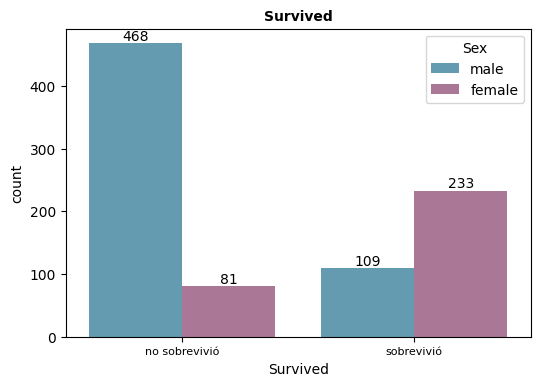

,Sex,Survived
0,female,0.74
1,male,0.19


In [245]:
countplot_survived('Survived', 'Sex', ['no sobrevivió', 'sobrevivió'], ['#58A0BD', '#B46E99'])
tabla_superviviencia('Sex')

### Clase social

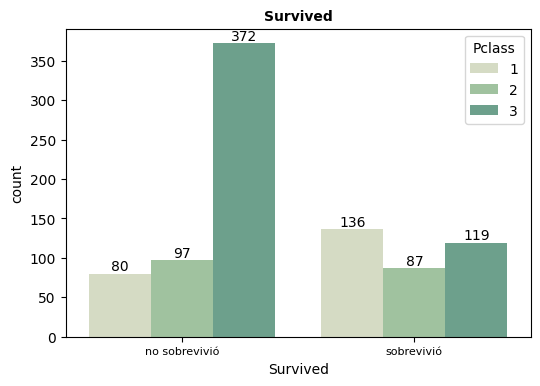

,Pclass,Survived
0,1,0.63
1,2,0.47
2,3,0.24


In [246]:
countplot_survived('Survived', 'Pclass', ['no sobrevivió', 'sobrevivió'])
tabla_superviviencia('Pclass')

### Número de familiares a bordo

**Según el número de hermanos y cónyugues:**

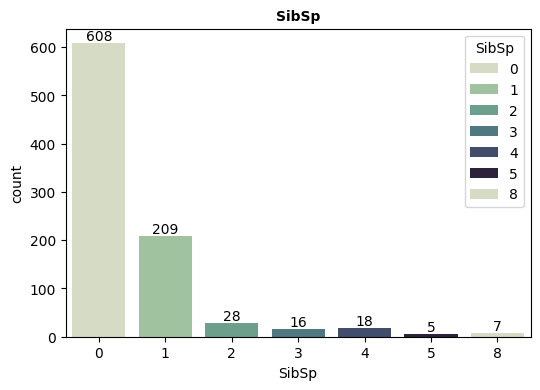

,SibSp,Survived
1,1,0.54
2,2,0.46
0,0,0.35
3,3,0.25
4,4,0.17
5,5,0.00
6,8,0.00


In [247]:
countplot_legend('SibSp')
tabla_superviviencia('SibSp')

**Según el número de padres e hijos:**

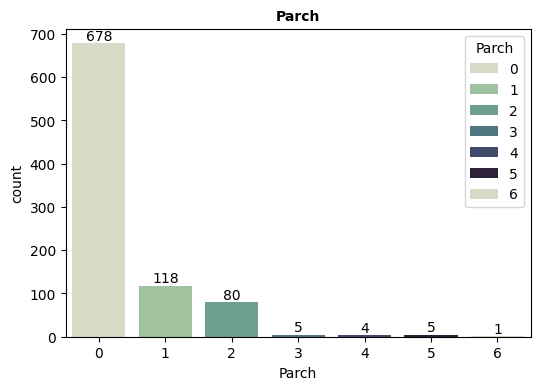

,Parch,Survived
3,3,0.60
1,1,0.55
2,2,0.50
0,0,0.34
5,5,0.20
4,4,0.00
6,6,0.00


In [248]:
countplot_legend('Parch')
tabla_superviviencia('Parch')

### Edad

In [249]:
survival_by_age()

,Grupo de Edad,Survived,Count
0,Menores de 4 años,0.68,40
1,Mayores de 80 años,1.00,1
2,Entre 15 y 25 años,0.35,223
3,Entre 15 y 35 años,0.39,419


## Otras gráficas

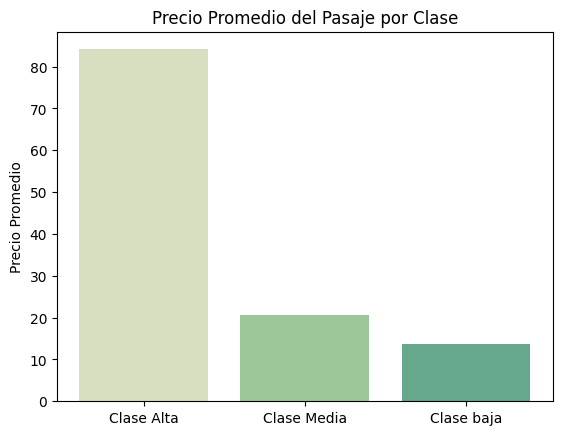

,Pclass,Libras en 1912,Libras actuales
0,1,84.154687,"2,119.96"
1,2,20.662183,529.99
2,3,13.675550,353.33


In [250]:
fare_medio_pclass()

Precio promedio del pasaje en base a la clase social de la persona que lo compró. Hay algunos valores para Fare que son 0 lo que hace que la media baje ligeramente.

In [251]:
df = titanic.copy()
df.dropna(subset=['Age'], inplace=True)
fig = px.scatter(df, x="Age", y="Pclass", color="Survived",
                 size='Age', hover_data=['Age'])
fig.show()

En el dataset se muestran 15 personas que no pagaron pasaje; **los trabajadores del barco.**

In [252]:
titanic[titanic['Fare']== 0]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


De los cuales solo sobrevivió uno :(

In [253]:
titanic[(titanic['Fare'] == 0) & (titanic['Survived'] == 1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S


## Matriz de correlación

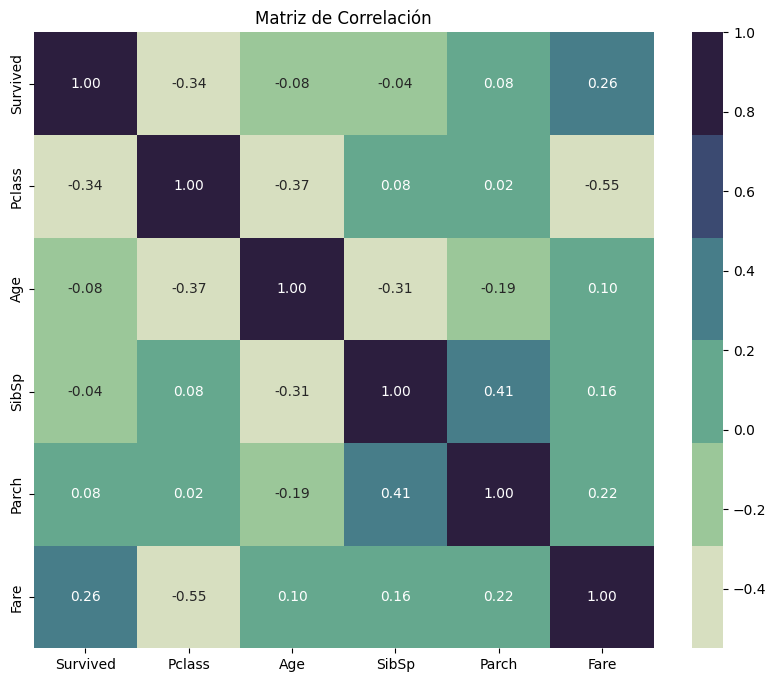

In [254]:
plt.figure(figsize=(10, 8))
sb.heatmap(titanic.corr(), annot=True, cmap=cubehelix, fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

La columna survived está bastante relacionada con Pclass y Fare 🙄.

Y como era de esperar Pclass está también muy relacionado con Fare.

SibSp y Parch están también muy relacionados.


# **TRATAMIENTO DE VALORES NULOS**

In [255]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## Embarked

Se muestran los dos campos con embarque nulo para ver si puede haber alguna clase de correlación que nos permita deducir cual es el puerto:

In [256]:
titanic[titanic['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


No hay ninguna forma de saber el embarque de estas personas y al tratarse solo de dos filas lo más adecuado es borrarlas:

In [257]:
titanic.dropna(subset=['Embarked'], inplace=True)

## Age

La columna Age cuenta con 177 valores nulos, los cuales vamos a rellenar con la mediana.

In [258]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

## Cabin

La columna Cabin cuenta con muchos valores nulos, por lo que las mejores opciones serían borrar la columna o rellenarlos todos con una nueva categoría 'No Cabin'.

In [259]:
titanic["Cabin"].fillna("No Cabin", inplace = True)

In [260]:
titanic.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# **TRATAMIENTO DE OUTLIERS**

## Age

In [261]:
fig = go.Figure()
fig.add_trace(go.Box(y=titanic[titanic['Sex'] == 'male']['Age'], name='HOMBRES', marker_color = gnbu[7]))
fig.add_trace(go.Box(y=titanic[titanic['Sex'] == 'female']['Age'], name='MUJERES', marker_color = '#B46E99'))
fig.show()

A pesar de que en el Box Plot aparecen algunas edades como outliers no las voy a borrar porque están dentro de rangos normales.

## Fare

In [262]:
fig = go.Figure()
fig.add_trace(go.Box(y=titanic['Fare'], name='PRECIO DE LA TARIFA', marker_color = '#DBA256'))
fig.show()

In [263]:
titanic.sort_values(by='Fare', ascending=False)[:3]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,No Cabin,C
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C


**Thomas Cardeza**, miembro de unas de las familias más destacadas de Filadelfia.

Ocupó una de las dos suites de lujo (Suite B51 / 53/55​). Lo acompañaba su madre, su doncella **Annie Ward** y su propio valet o sirviente personal **Gustave Lesueur**.

In [264]:
def borrar_outliers(columna):
  Q1, Q3 = titanic[columna].quantile(0.25), titanic[columna].quantile(0.75)
  IQR = Q3 - Q1
  mediana, minimo, maximo = titanic[columna].median(), titanic[columna].min(), titanic[columna].max()
  BI, BS = (Q1 - 1.5 * IQR), (Q3 + 1.5 * IQR)
  return titanic[(titanic[columna] >= BI) & (titanic[columna] <= BS)].sort_values(columna)

In [265]:
titanic = borrar_outliers('Fare')

In [266]:
fig = go.Figure()
fig.add_trace(go.Box(y=titanic['Fare'], name='PRECIO DE LA TARIFA', marker_color = '#DBA256'))
fig.show()